In [ ]:
# 전처리 연습 (범주형)

### 범주형 변수 categorical data 처리
* 라벨인코딩(Label Encoding)
* 원핫인코딩(One-hot Encoding)
* 범주화(Bining)

> <font size=4><b>(1) 라벨인코딩(Label Encoding)
> * n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현

> <font size=4><b>(2) 원핫인코딩(One-hot Encoding)
> * 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
> *  데이터프레임에서 object 타입으로 되어있는 변수는 dummy 변수화
> * <font color=red><b> 판다스의 시리즈가 아닌 numpy 행렬을 입력해야함 → df['컬럼'].values
> * <font color=red><b> 벡터 입력을 허용하지 않음 → reshape(-1,1)을 이용해 Matrix로 변환  (N,) → (N,1)

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv("../comp/titanic/train.csv")[["Pclass","Age","Embarked"]][:10]
train.columns = train.columns.str.lower()


In [21]:
le = LabelEncoder()
data =train["embarked"]
le.fit(data)

le.transform(data)

res = le.transform(data)

print(res)



[2 0 2 2 2 1 2 2 2 0]


In [22]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [24]:
le.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

In [33]:
data = train["embarked"]
data.values
data = data.values.reshape(-1,1)
data

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C']], dtype=object)

In [50]:
oh = OneHotEncoder(sparse_output=False, dtype=np.int64)
oh.fit(data)
res = oh.transform(data)
print(res)

[[0 0 1]
 [1 0 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]


In [51]:
train[["a","b","c"]] = res
train.head(3)

,pclass,age,embarked,a,b,c
0,3,22.0,S,0,0,1
1,1,38.0,C,1,0,0
2,3,26.0,S,0,0,1


In [27]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

In [13]:
# 아이리스 데이터
mydict = load_iris()
mydict.keys()
mydict['data'][:3]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [23]:
mydict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
mydict['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
mydict['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [68]:
mydict['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
mydict['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [67]:
sepal_length_value = mydict['target_names']['sepal length (cm)']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [62]:
df = {
      # 'target': mydict['target'],
      # 'frame' : mydict['frame'],
      # 'target_names' : mydict['target_names'],
      # 'DESCR' : mydict['DESCR'],
      # 'feature_names' : mydict['feature_names'],
      'sepal length (cm)':mydict['target_names']['sepal length (cm)']
      # 'filename' : mydict['filename'],
      # 'data_module': mydict['data_module']
     }

df = pd.DataFrame(df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [49]:
df

,target,frame
0,0,None
1,0,None
2,0,None
3,0,None
4,0,None
...,...,...
145,2,None
146,2,None
147,2,None
148,2,None


In [92]:
df = pd.DataFrame(data=mydict["data"], columns=mydict['feature_names'])
df.columns = ['sl','sw','pl','pw']
df.head()    

df["target"] = mydict["target"]


In [93]:
df

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


array([[<Axes: title={'center': 'sl'}>, <Axes: title={'center': 'sw'}>],
       [<Axes: title={'center': 'pl'}>, <Axes: title={'center': 'pw'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

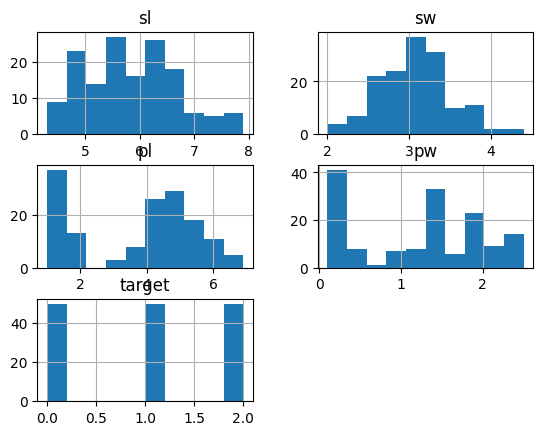

In [94]:
df.hist()

<Axes: >

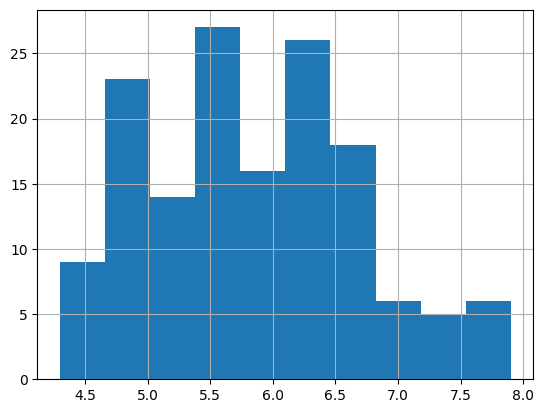

In [96]:
df['sl'].hist()

In [109]:
ss.fit(df['sl'].values.reshape(-1,1))
df['sl_ss'] = ss.transform(df['sl'].values.reshape(-1,1))

In [102]:
df.head()

,sl,sw,pl,pw,target,sl_ss
0,5.1,3.5,1.4,0.2,0,-0.900681
1,4.9,3.0,1.4,0.2,0,-1.143017
2,4.7,3.2,1.3,0.2,0,-1.385353
3,4.6,3.1,1.5,0.2,0,-1.506521
4,5.0,3.6,1.4,0.2,0,-1.021849


<Axes: >

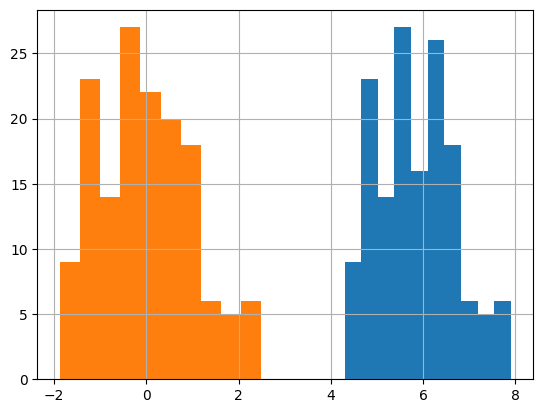

In [106]:
df['sl'].hist()
df['sl_ss'].hist()

In [110]:
mm.fit(df['sl'].values.reshape(-1,1))
df['mm_ss'] = mm.transform(df['sl'].values.reshape(-1,1))

<Axes: >

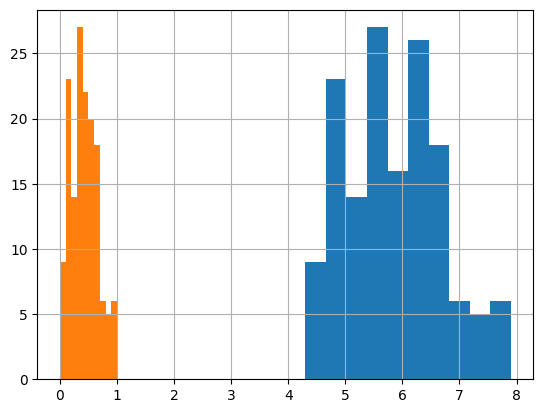

In [114]:
df['sl'].hist()
df['mm_ss'].hist()

In [ ]:
rs.fit(df['sl'].values.reshape(-1,1))
df['rs_ss'] = rs.transform(df['sl'].values.reshape(-1,1))

In [119]:
from sklearn.model_selection import train_test_split

In [142]:
train, test = train_test_split(df, test_size=0.2)
train.shape, test.shape

((120, 7), (30, 7))

In [143]:
train = pd.DataFrame(data = range(1,11))
train

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [144]:
test = pd.DataFrame(data = range(1,6))
test

,0
0,1
1,2
2,3
3,4
4,5


In [147]:
mm.fit(train)
res = mm.transform(train)
# train['mm'] = res.transform(train)
res.reshape(-1)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [150]:
# mm.fit(test)
res2 = mm.transform(test)
res2

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444]])